<h1 style="text-align:center"><strong>📊 SEMMA aplicado a "BikeBuyer"</strong></h1>

# **SETUP ENTORNO**

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

# Carpetas para guardar lod archivos
os.makedirs("outputs/graficos", exist_ok=True)


# **1. SAMPLE - MUESTRA** 

In [114]:
df = pd.read_csv("data/Ejercicio_Aplicacion_SEMMA.csv", sep=None, engine="python")

# Tamaño inicial
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

Filas: 18484, Columnas: 31


,﻿CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,6/10/1986,M,...,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,19/01/2011,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,10/05/1991,S,...,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,15/01/2011,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,9/02/1986,M,...,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,7/01/2011,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,14/08/1988,S,...,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,29/12/2010,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,5/08/1994,S,...,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,23/01/2011,1-2 Miles,Pacific,1


# **2. EXPLORE - EXPLORACIÓN**

In [176]:
# Valores nulos
nulos = df.isnull().sum()
print("Valores nulos por columna:\n", nulos[nulos > 0])

Valores nulos por columna:
 Title           18383
MiddleName       7830
BirthDate       10228
AddressLine2    18172
Age             10228
dtype: int64


In [177]:
# Usamos BirthDate la usamos para calcular la edad
if 'BirthDate' in df.columns:
    df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')
    df['Age'] = 2025 - df['BirthDate'].dt.year
elif 'YearBirth' in df.columns:
    df['Age'] = 2025 - df['YearBirth']
else:
    print("No se encontró columna para calcular 'Age'")

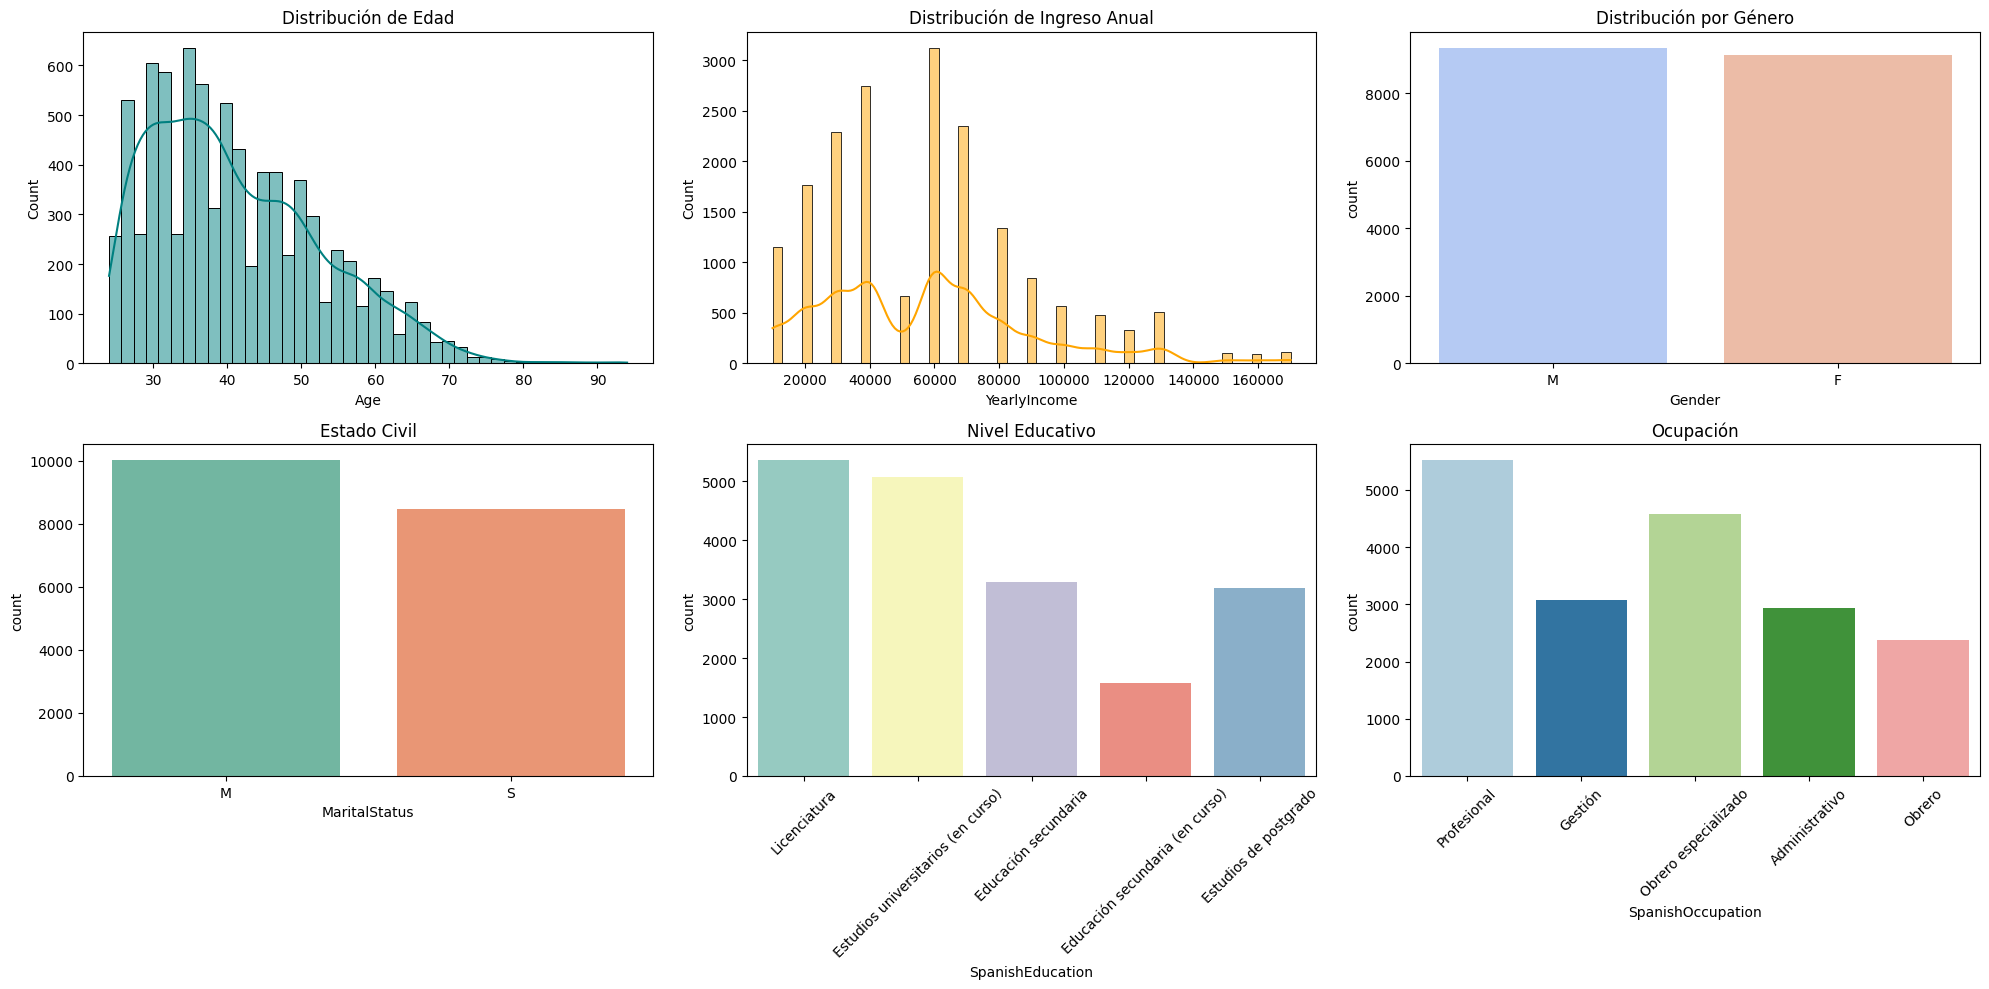

In [178]:
# Distribuciones de difentes variables
df.rename(columns=lambda x: x.strip(), inplace=True)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Edad
if 'Age' in df.columns:
    sns.histplot(df['Age'], kde=True, ax=axs[0, 0], color='teal')
    axs[0, 0].set_title('Distribución de Edad')
else:
    axs[0, 0].text(0.5, 0.5, 'No hay columna Age', ha='center', va='center')
    axs[0, 0].set_title('Distribución de Edad')

# Ingreso
if 'YearlyIncome' in df.columns:
    sns.histplot(df['YearlyIncome'], kde=True, ax=axs[0, 1], color='orange')
    axs[0, 1].set_title('Distribución de Ingreso Anual')
else:
    axs[0, 1].text(0.5, 0.5, 'No hay columna YearlyIncome', ha='center', va='center')
    axs[0, 1].set_title('Distribución de Ingreso')

# Género
if 'Gender' in df.columns:
    sns.countplot(data=df, x='Gender', hue='Gender', legend=False, ax=axs[0, 2], palette='coolwarm')
    axs[0, 2].set_title('Distribución por Género')
else:
    axs[0, 2].text(0.5, 0.5, 'No hay columna Gender', ha='center', va='center')
    axs[0, 2].set_title('Distribución por Género')

# Estado Civil
if 'MaritalStatus' in df.columns:
    sns.countplot(data=df, x='MaritalStatus', hue='MaritalStatus', legend=False, ax=axs[1, 0], palette='Set2')
    axs[1, 0].set_title('Estado Civil')
else:
    axs[1, 0].text(0.5, 0.5, 'No hay columna MaritalStatus', ha='center', va='center')
    axs[1, 0].set_title('Estado Civil')

# Educación
if 'SpanishEducation' in df.columns:
    sns.countplot(data=df, x='SpanishEducation', hue='SpanishEducation', legend=False, ax=axs[1, 1], palette='Set3')
    axs[1, 1].set_title('Nivel Educativo')
    axs[1, 1].tick_params(axis='x', rotation=45)
else:
    axs[1, 1].text(0.5, 0.5, 'No hay columna SpanishEducation', ha='center', va='center')
    axs[1, 1].set_title('Nivel Educativo')

# Ocupación
if 'SpanishOccupation' in df.columns:
    sns.countplot(data=df, x='SpanishOccupation', hue='SpanishOccupation', legend=False, ax=axs[1, 2], palette='Paired')
    axs[1, 2].set_title('Ocupación')
    axs[1, 2].tick_params(axis='x', rotation=45)
else:
    axs[1, 2].text(0.5, 0.5, 'No hay columna SpanishOccupation', ha='center', va='center')
    axs[1, 2].set_title('Ocupación')

plt.tight_layout()
plt.savefig('outputs/graficos/distribuciones_demograficas_actualizadas.png')
plt.show()


In [179]:
# Eliminar la columna 'NameStyle' del DataFrame de correlaciones

fig = px.imshow(correlaciones,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                aspect='auto',
                title="Mapa de calor interactivo de correlaciones")
fig.write_html("outputs/graficos/correlaciones_interactivas.html")
fig.show()





# **3. MODIFY - MODIFICACIÓN**

In [ ]:
# Eliminar columnas irrelevantes 
cols_drop = ['NameStyle', 'Suffix']
df.drop(columns=cols_drop, inplace=True)

In [ ]:
# Eliminar columnas con datos repetitivos (diferentes idiaomas)
cols_drop = [ 'EnglishEducation', 'FrenchEducation',
            'EnglishOccupation', 'FrenchOccupation']
df.drop(columns=cols_drop, inplace=True)

In [155]:
# ccolumna de clasificación de ingresos
def clasificar_ingreso(valor):
    if valor < 30000:
        return 'Bajo'
    elif valor < 70000:
        return 'Medio'
    else:
        return 'Alto'

df['SegmentoIngreso'] = df['YearlyIncome'].apply(clasificar_ingreso)


In [154]:
# Coumna de clasificación por grupo etario
def clasificar_edad(edad):
    if edad < 25:
        return 'Joven'
    elif edad < 45:
        return 'Adulto'
    elif edad < 65:
        return 'Adulto mayor'
    else:
        return 'Senior'

df['SegmentoEdad'] = df['Age'].apply(clasificar_edad)

# **4. MODEL - MODELADO**

In [ ]:
# Definir X e y
y = df['BikeBuyer']
X = df.drop(columns=['BikeBuyer'])

# Dividir los datos (20% para prueba por setr demasiados)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas categóricas
categorical_columns = ['CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'MaritalStatus', 
                    'Gender', 'EmailAddress', 'SpanishEducation', 'SpanishOccupation', 'AddressLine1', 
                    'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance', 'Region']

# Aplicar get_dummies a las columnas categóricas
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Alinear las columnas 
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Eliminación de columnas no necesarias
X_train = X_train.drop(columns=['BirthDate'])
X_test = X_test.drop(columns=['BirthDate'])

# Selección de columnas relevantes para reducir la carga de memoria
columns_to_keep = ['YearlyIncome', 'TotalChildren', 'HouseOwnerFlag', 'NumberCarsOwned', 'Age']
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

# Imputar nulos en Age con la mediana
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())

print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Escalado de Características
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificación de la Variable Objetivo
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelo 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)

# Modelo 2: Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict_proba(X_test)



YearlyIncome       0
TotalChildren      0
HouseOwnerFlag     0
NumberCarsOwned    0
Age                0
dtype: int64
0


# **5. ASSETS - EVALUACIÓN**

In [170]:
# Convertir las probabilidades a clases predichas (umbral de 0.5)
y_pred_rf_classes = (y_prob_rf >= 0.5).astype(int)
y_pred_gb_classes = (y_prob_gb >= 0.5).astype(int) 

# Evaluar el modelo Random Forest con las clases predichas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf_classes))
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf_classes))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_classes))

# Evaluar el modelo Gradient Boosting de la misma forma
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb_classes))
print("Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb_classes))
print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_classes))


Random Forest - Accuracy: 0.6829862050311063
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1884
           1       0.69      0.64      0.66      1813

    accuracy                           0.68      3697
   macro avg       0.68      0.68      0.68      3697
weighted avg       0.68      0.68      0.68      3697

Random Forest - Confusion Matrix:
 [[1364  520]
 [ 652 1161]]
Gradient Boosting - Accuracy: 0.6648634027589938
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      1884
           1       0.66      0.64      0.65      1813

    accuracy                           0.66      3697
   macro avg       0.66      0.66      0.66      3697
weighted avg       0.66      0.66      0.66      3697

Gradient Boosting - Confusion Matrix:
 [[1300  584]
 [ 655 1158]]


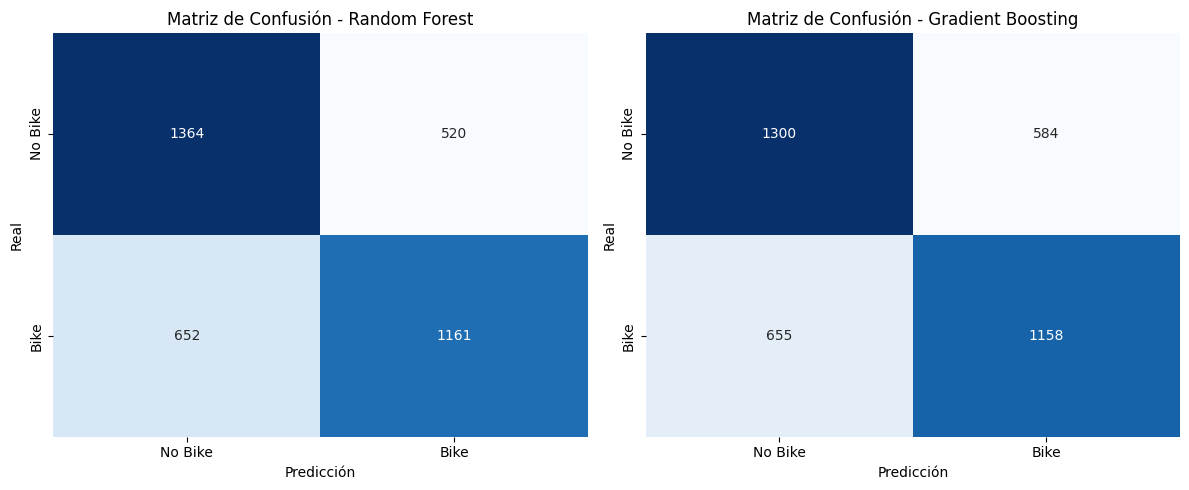

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear las matrices de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf_classes)
cm_gb = confusion_matrix(y_test, y_pred_gb_classes)

# Crear un gráfico de la matriz de confusión para Random Forest
plt.figure(figsize=(12, 5))

# Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Bike', 'Bike'], yticklabels=['No Bike', 'Bike'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Gradient Boosting
plt.subplot(1, 2, 2)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Bike', 'Bike'], yticklabels=['No Bike', 'Bike'])
plt.title('Matriz de Confusión - Gradient Boosting')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.savefig('outputs/graficos/matriz_de_confuson.png')
plt.show()


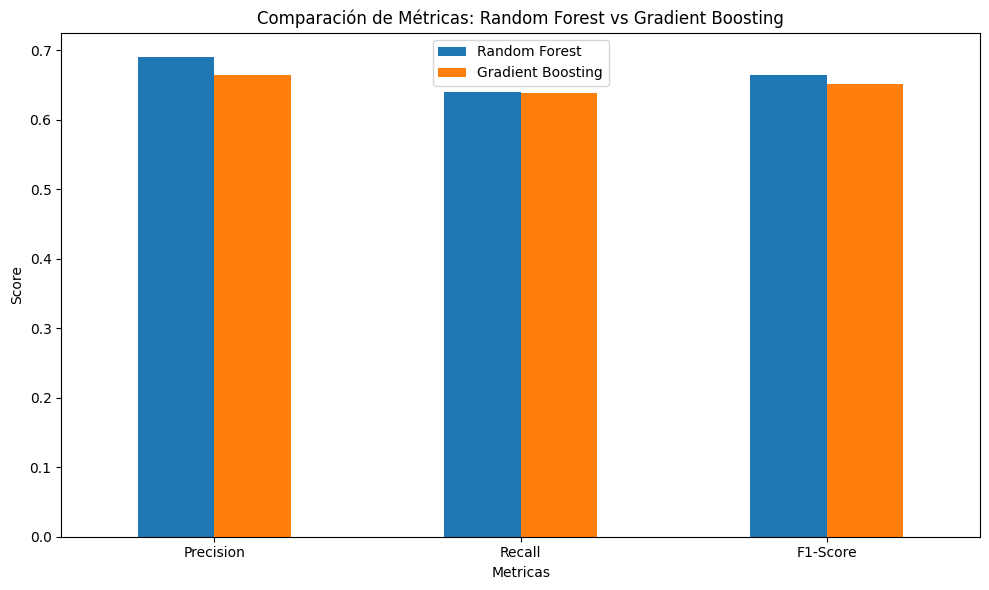

In [172]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular las métricas para Random Forest
precision_rf = precision_score(y_test, y_pred_rf_classes)
recall_rf = recall_score(y_test, y_pred_rf_classes)
f1_rf = f1_score(y_test, y_pred_rf_classes)

# Calcular las métricas para Gradient Boosting
precision_gb = precision_score(y_test, y_pred_gb_classes)
recall_gb = recall_score(y_test, y_pred_gb_classes)
f1_gb = f1_score(y_test, y_pred_gb_classes)

# Crear un DataFrame para facilitar el gráfico
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Random Forest': [precision_rf, recall_rf, f1_rf],
    'Gradient Boosting': [precision_gb, recall_gb, f1_gb]
})

# Graficar las métricas
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas: Random Forest vs Gradient Boosting')
plt.ylabel('Score')
plt.xlabel('Metricas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('outputs/graficos/presicion_recall_f1score.png')
plt.show()


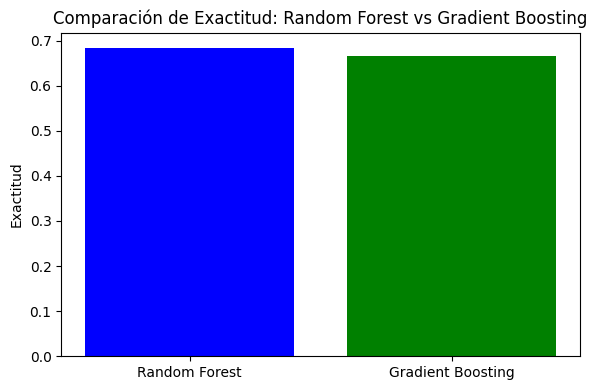

In [173]:
# Calcular la exactitud de ambos modelos
accuracy_rf = accuracy_score(y_test, y_pred_rf_classes)
accuracy_gb = accuracy_score(y_test, y_pred_gb_classes)

# Graficar la comparación de precisión entre ambos modelos
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'Gradient Boosting'], [accuracy_rf, accuracy_gb], color=['blue', 'green'])
plt.title('Comparación de Exactitud: Random Forest vs Gradient Boosting')
plt.ylabel('Exactitud')
plt.tight_layout()
plt.savefig('outputs/graficos/cpmapracion_exatitud.png')
plt.show()
